<img src="https://si37qa.bn.files.1drv.com/y4mpcrzz92o89x2bZp_7aRHVp4AA5MGb6KBqyH7LOD5vyp8USPO4HWtFgbdyuGKAGlrwMFJLgemexsYxCej9rrVWHvVgmBX3JuSV2W3KBRpqMJiVTZLpBlCn-eBAuIiSf3i6BuqMhSPkcrRKZf4I7KKHrqva4iM9iKkmtVU1FgQmF6LPJ7X5B8XpANSigXWDNuslXym1cplYgXrnbYb0TCplg?width=5975&height=2038&cropmode=none" width="5975" height="2038" />

## <font color='dimgray'>Last Project's Details:</font> <font color='gray' size=4>The Winner Swimmer: Predicting Male Infertility through KNN Classifier </font>

> ### <font color='gray'>Revisiting the Problem</font>
Fertility rates of men started experiencing a decline for the past decades, with the worldwide male fertility rate dropping by 15%. The existence of this problem could suggest a shortage in a country's labor force, which plays a crucial role in the calculation of a country's economic status. In an attempt to determine predictors of male infertility, the group modeled the data using K-Nearest Neighbors, considering factors from one's **environment**, **medical history**, and **lifestyle**. Read more on this [topic](https://bit.ly/winner-swimmer?fbclid=IwAR1zFP51aDoO3Xe9Nj6EpFH-kxoA70rNOAPmSqxKumyQoza2sml1vWmtbZc).

> ### <font color='gray'>Data Description</font>
| Feature 	| Description 	|
|-	|-	|
| season 	| Season in which the analysis was performed 	|
| age 	| Age at time of analysis (18-36 normalized) 	|
| childish_disease 	| Presence of disease during childhood (0 or 1) 	|
| acc_trauma 	| Involvement in accident or serious trauma (0 or 1) 	|
| surgical_int 	| Involvement in surgical interventions (0 or 1) 	|
| high_fevers 	| Experienced a case of high fever in the recent year<br>(-1), more than 3 months ago (0), <br>to less than 3 months ago (1) 	|
| alcohol_freq 	| Frequency of alcohol consumption [1-5 (lowest) <br>from several times a day to hardly ever/never] 	|
| smoking 	| Smoking habit [-1 : never, 0 : occasional, 1 : daily] 	|
| sitting hours 	| Number of hours spent sitting (1-16 hours) 	|

> ### <font color='gray'>Previous Highlights</font>
Three Highlights of the k-NN Classifier are:
1. Smoking has the highest sensitivity that can deteriorate fertility in men.
2. Historic medical complications\* affect fertility as high as smoking does.
3. Alcohol intake didn’t yield high sensitivity to influence male fertility.
*<i><sup>Prolonged high fever, child diseases (mumps, measles, and others), surgical intervention</sup></i>

## <font color='navy'>Summary of Findings for this Study</font>

> Upon performing the additional Machine Learning Methods below, the group was able to improve upon the initial accuracy of 88% to **99.94%** using the **Non-Linear Support Vector Machine Classifier with the Radial Basis Function (rbf) kernel with $\gamma = 20.0$**. Amongst the 8 other features, sitting hours proved to be the best variable when it came to predicting alterations in male fertility, for one is subjected to an increase in the risk of having *Oligospermia* or low sperm production due to the increased temperature of the scrotum when sitting for long periods. Another highlight of the study finds that frequent alcohol intake ranks second as it temporarily reduces sperm count and testosterone levels. 

<center>
    <h4>Model Results Summary</h4>
</center>

|Machine Learning Method| Test Accuracy | Best Parameter | Top Predictor Variable
| :---: | :---: | :----: |:---:|
| kNN | 87.86% | N_Neighbor = 3| age
| Logistic (L1) | 72.81% |C=20| age
| Logistic (L2) | 72.58% | C=100 | age
| Linear SVM (L1) |72.55% | C=1000 | age
| Linear SVM(L2) | 72.55%| C=20 | age
| Non-Linear SVM (rbf) | 99.94%| gamma = 20 | sitting hours


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from Auto_BeLMS import AutoBelms as abl
from Auto_BeLMS.MySVM import MySVM
from Auto_BeLMS.MyKNNClassifier import MyKNNClassifier
from Auto_BeLMS.MyLogisticRegression import MyLogisticRegression
from IPython.core.display import HTML
%matplotlib inline

In [41]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
value="Click here to toggle on/off the raw code."></form>''')

In [2]:
column_names=['season', 'age', 'childish_disease', 'Acc_trauma', 
              'surgical_int', 'high_fevers', 'alcohol_freq', 'smoking', 
              'sitting_hours', 'target']
df = pd.read_csv('fertility_Diagnosis.txt', header=None, names=column_names)
df.head()

,season,age,childish_disease,Acc_trauma,surgical_int,high_fevers,alcohol_freq,smoking,sitting_hours,target
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


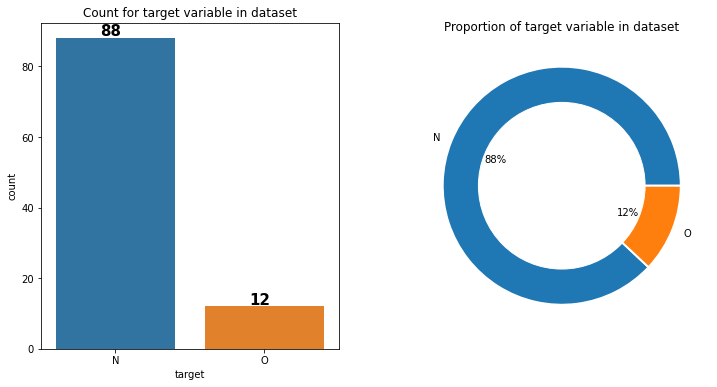

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
ax = sns.countplot(x=df["target"],
                   linewidth=1)
for i, j in enumerate(df["target"].value_counts().values):
    ax.text(i-.1, .7 + j, j, weight="bold", fontsize=15)
plt.title("Count for target variable in dataset")


plt.subplot(122)
plt.pie(df["target"].value_counts().values, labels=['N', 'O'],
        autopct="%1.0f%%", wedgeprops={"linewidth": 2, "edgecolor": "white"})
my_circ = plt.Circle((0, 0), .7, color="white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace=.25)
plt.title("Proportion of target variable in dataset")
plt.show()

## EDA and KNN Implementation on the Fertility Dataset

In [6]:
print(f"The dataset shape: {df.shape}\n")
print("Checking for nulls...")
print(df.isnull().any())
print("\nData type of each column:\n")
print(df.info())

The dataset shape: (100, 10)

Checking for nulls...
season              False
age                 False
childish_disease    False
Acc_trauma          False
surgical_int        False
high_fevers         False
alcohol_freq        False
smoking             False
sitting_hours       False
target              False
dtype: bool

Data type of each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            100 non-null    float64
 1   age               100 non-null    float64
 2   childish_disease  100 non-null    int64  
 3   Acc_trauma        100 non-null    int64  
 4   surgical_int      100 non-null    int64  
 5   high_fevers       100 non-null    int64  
 6   alcohol_freq      100 non-null    float64
 7   smoking           100 non-null    int64  
 8   sitting_hours     100 non-null    float64
 9   target            100 

In [7]:
N = df.shape[0]
m_count_list = []
for i in list(df['target'].unique()):
    m_count_list.append(df[df['target'] == i].shape[0])
PCC = sum([(m/N)**2 for m in m_count_list])
print('PCC is ', PCC)
print('Accuracy to beat* is ', PCC * 1.25)
print('*based on 1.25Pcc')

PCC is  0.7888
Accuracy to beat* is  0.986
*based on 1.25Pcc


### Explore different models

In [11]:
# Convert target to numeric data
target = pd.get_dummies(target, drop_first=True).squeeze()

In [12]:
models = abl.classifier_models
models['KNN Classifier']['nlist'] = list(range(1, 51))
models['KNN Classifier']['n_jobs'] = -1

Simulate other models

Training KNN Classifier



1089.7208323478699 seconds


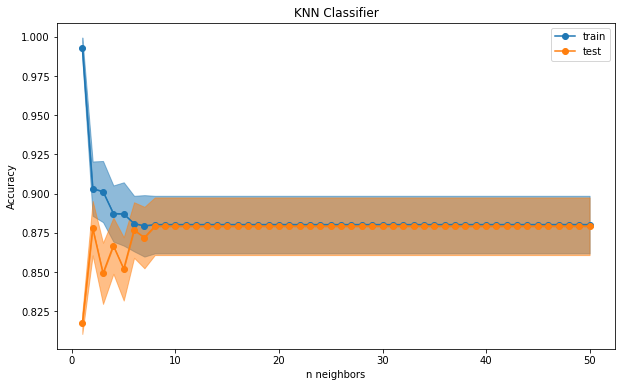

Training Logistic Regression L1


C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



8.587836742401123 seconds


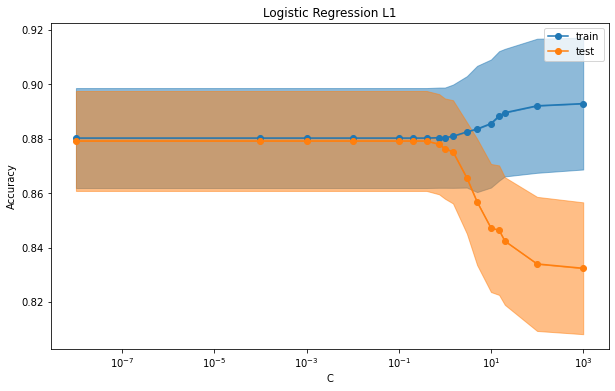

Training Logistic Regression L2


C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



14.530115842819214 seconds


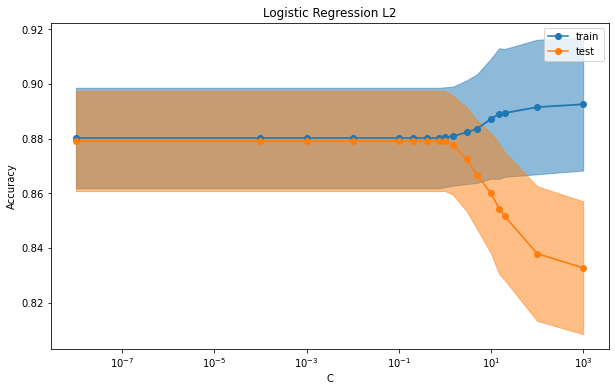

Training Linear SVM L1


C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



8.686795234680176 seconds


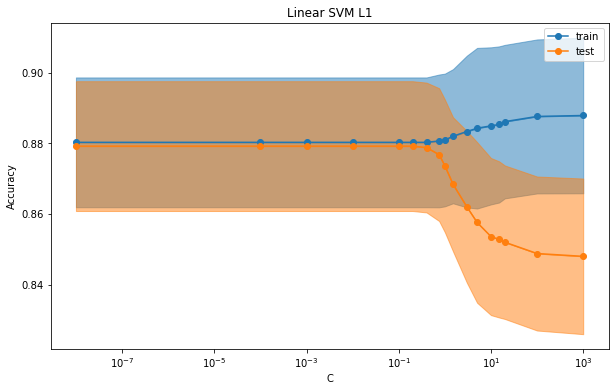

Training Linear SVM L2


C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



8.971000909805298 seconds


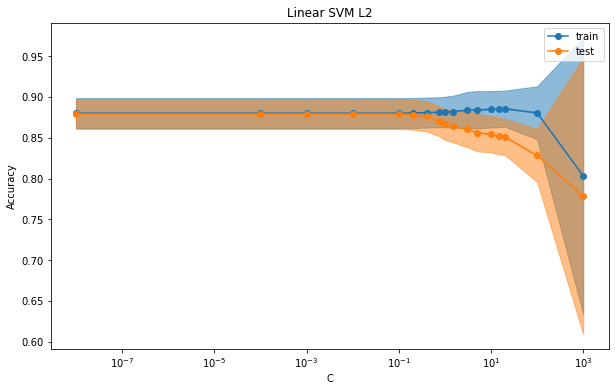

Training Non-Linear SVM RBF


C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



9.299156188964844 seconds


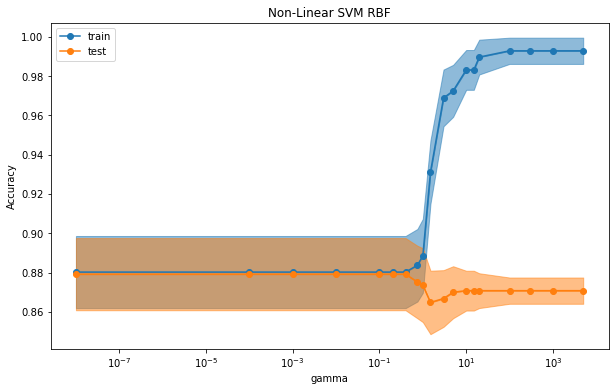

C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Best Parameter,Accuracy,Top Predictor,Train Time
0,KNN Classifier,n neighbors = 8,0.8792,sitting_hours,1089.720832
1,Logistic Regression L1,C = 1e-08,0.8792,age,8.587837
2,Logistic Regression L2,C = 1e-08,0.8792,age,14.530116
3,Linear SVM L1,C = 1e-08,0.8792,age,8.686795
4,Linear SVM L2,C = 1e-08,0.8792,age,8.971001
5,Non-Linear SVM RBF,gamma = 1e-08,0.8792,sitting_hours,9.299156


In [13]:
abl.simulate_classifiers(features, target, models=models,
                         sim_size=100, figsize=(10, 6))

Our group observed that the 1.25Pcc(0.986) is unbeatable using the original dataset. All models yields an accuracy of 0.88. Thus in the following section tried Oversampling with different classification models to try to beat the 1.25Pcc.

#### Exploring Non-Linear SVM RBF

In [14]:
svm = MySVM(100)
df_train, df_test = svm.train_model(features, target, kernel='rbf')

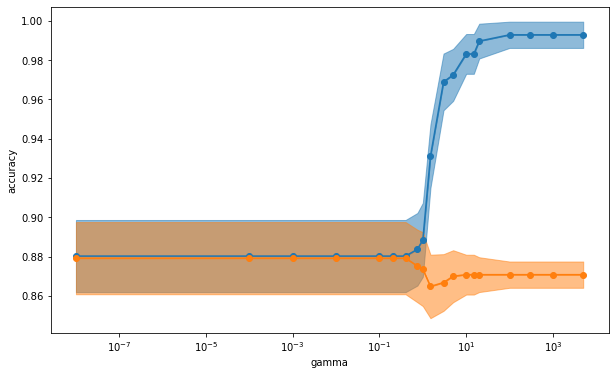

In [15]:
plt.figure(figsize=(10,6))
ax = plt.gca()
svm.create_errorband_axes(ax=ax)
ax.set_xscale('log')
ax.set_xlabel(svm.setting)
ax.set_ylabel('accuracy')
plt.show()

In [16]:
svm.get_toppredictors()

,score
sitting_hours,0.88
smoking,0.88
alcohol_freq,0.88
high_fevers,0.88
surgical_int,0.88
Acc_trauma,0.88
childish_disease,0.88
age,0.88
season,0.88


Sitting_hours is the top predictor followed by alcohol_freq while lowest predictor is surgical int.

C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.9200,1.00,0.958333,23.00
1,0.0000,0.00,0.000000,2.00
accuracy,0.9200,0.92,0.920000,0.92
macro avg,0.4600,0.50,0.479167,25.00
weighted avg,0.8464,0.92,0.881667,25.00


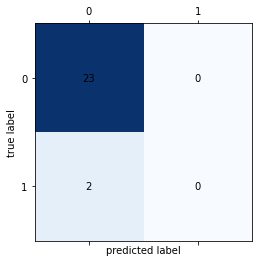

In [17]:
svm.get_metric(ax=plt.gca(), random_state=0)['report']

For the original dataset, the group observed 0 precision and recall for class 1.

## Oversampling

In [20]:
df_sample = df.loc[df['target'] == 'O'].sample(72, random_state=1, replace=True)
df_oversampled = df.append(df_sample)
df_oversampled.shape

(172, 10)

In [21]:
target = df_oversampled['target']
features = df_oversampled[column_names[:-1]]

In [22]:
target.value_counts()

N    88
O    84
Name: target, dtype: int64

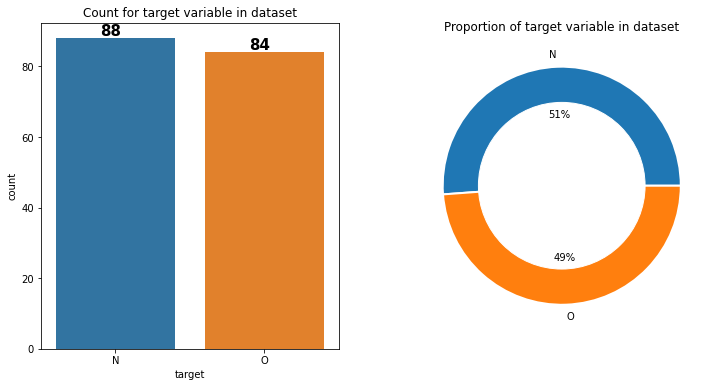

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
ax = sns.countplot(x=df_oversampled["target"],
                   linewidth=1)
for i, j in enumerate(df_oversampled["target"].value_counts().values):
    ax.text(i-.1, .7 + j, j, weight="bold", fontsize=15)
plt.title("Count for target variable in dataset")


plt.subplot(122)
plt.pie(df_oversampled["target"].value_counts().values, labels=['N', 'O'],
        autopct="%1.0f%%", wedgeprops={"linewidth": 2, "edgecolor": "white"})
my_circ = plt.Circle((0, 0), .7, color="white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace=.25)
plt.title("Proportion of target variable in dataset")
plt.show()

In [24]:
r, cnt = np.unique(target, return_counts=True)
pcc = sum([(c/len(target)) ** 2 for c in cnt])
print('PCC is ', pcc)
print('Accuracy to beat* is ', pcc * 1.25)
print('*based on 1.25Pcc')

PCC is  0.5002704164413196
Accuracy to beat* is  0.6253380205516496
*based on 1.25Pcc


### Explore different models

In [26]:
# Convert target to numeric data
target = pd.get_dummies(target, drop_first=True).squeeze()

Training KNN Classifier



1108.1940851211548 seconds


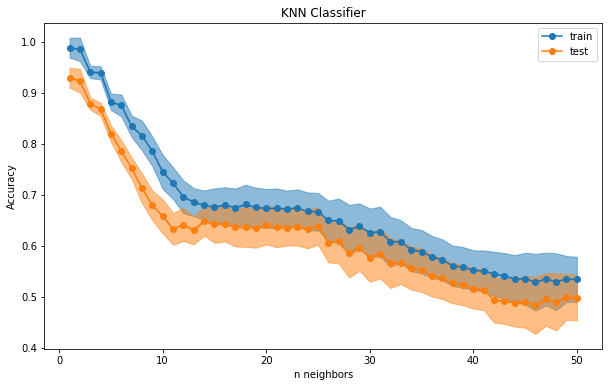

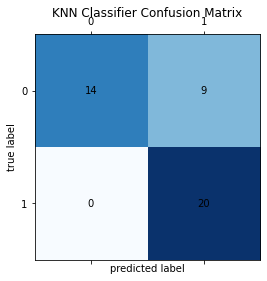

Training Logistic Regression L1



9.143539905548096 seconds


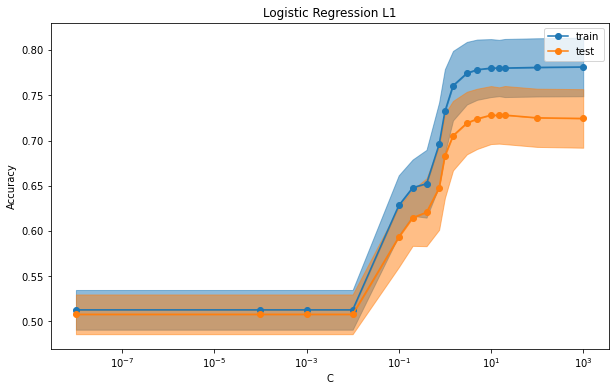

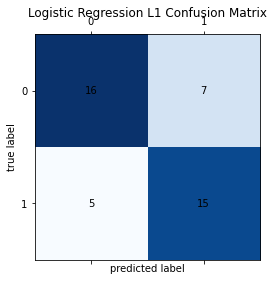

Training Logistic Regression L2



15.196311473846436 seconds


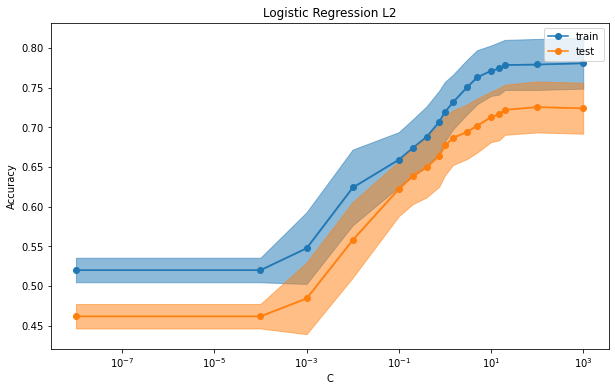

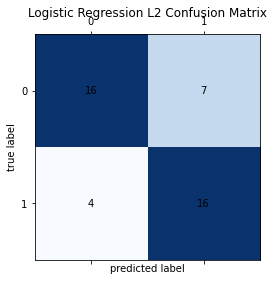

Training Linear SVM L1



9.376914978027344 seconds


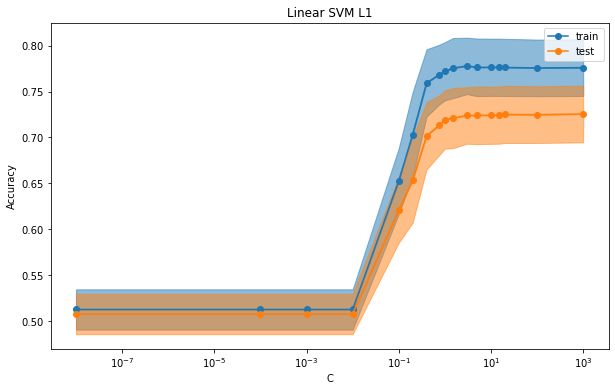

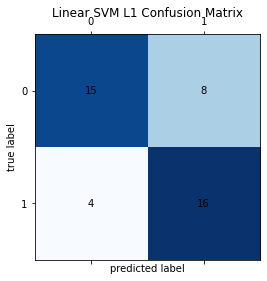

Training Linear SVM L2



10.50390076637268 seconds


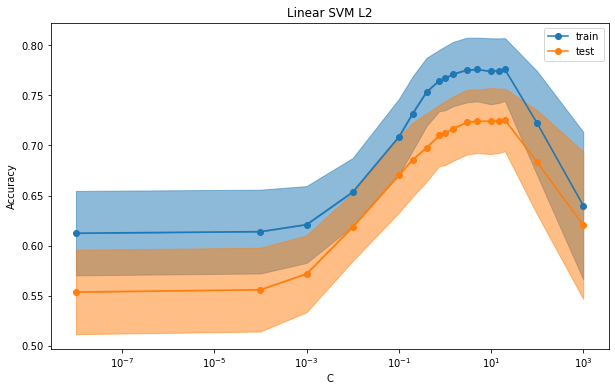

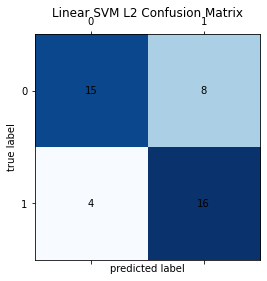

Training Non-Linear SVM RBF



10.301438570022583 seconds


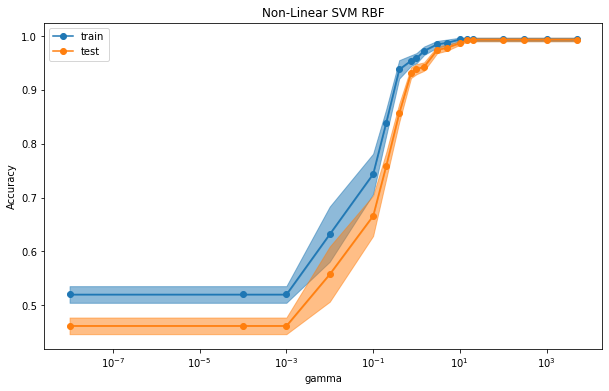

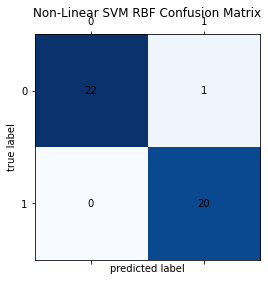

,Model,Best Parameter,Accuracy,Top Predictor,Train Time
0,KNN Classifier,n neighbors = 3,0.878605,age,1108.194085
1,Logistic Regression L1,C = 20.0,0.728140,age,9.143540
2,Logistic Regression L2,C = 100.0,0.725814,age,15.196311
3,Linear SVM L1,C = 1000.0,0.725581,age,9.376915
4,Linear SVM L2,C = 20.0,0.725581,age,10.503901
5,Non-Linear SVM RBF,gamma = 20.0,0.993721,sitting_hours,10.301439


In [27]:
abl.simulate_classifiers(features, target, models=models,
                         sim_size=100, figsize=(10, 6),
                         confmat=True)

Non-Linear SVM RBF yields the highest accuracy among other models with a score of 0.993721 and exceeds 1.25 Pcc. Even though Non-Linear SVM with RBF kernel has the highest accuracy, it is 100 times faster than KNN. However, Logistic Regression and Linear SVM for both L1 and L2 did not fare as well as using the unbalanced dataset which falls from 0.88 to 0.73 accuracy.

#### Exploring Logistic Regression L1

From the simulation above, Logistic Regression L1 is in the third place for the model that yields the highest accuracy.

In [28]:
logl1 = MyLogisticRegression(sim_size=100)
df_train, df_test = logl1.train_model(features, target,
                                      penalty='l1',
                                      solver='liblinear')

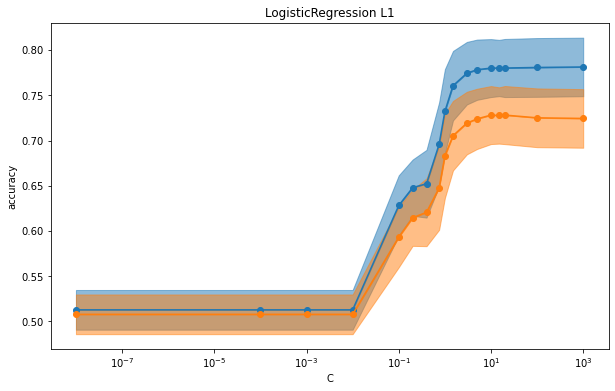

In [29]:
plt.figure(figsize=(10,6))
ax = plt.gca()
logl1.create_errorband_axes(ax=ax)
ax.set_xscale('log')
ax.set_xlabel(logl1.setting)
ax.set_ylabel('accuracy')
plt.title('LogisticRegression L1')
plt.show()

In [30]:
logl1.get_toppredictors()

,weight
age,2.821889
alcohol_freq,2.142644
sitting_hours,1.386188
Acc_trauma,0.769784
high_fevers,0.766582
season,0.422189
surgical_int,0.316631
smoking,0.115247
childish_disease,0.077268


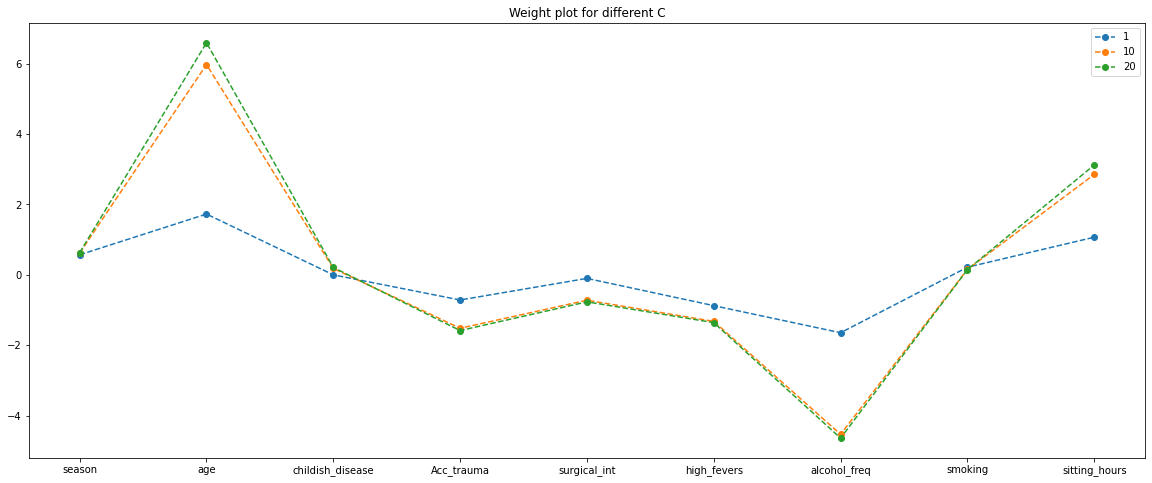

In [31]:
plt.figure(figsize=(20, 8))
ax = plt.gca()
ax = logl1.create_weightplot_axes([1, 10, 20], ax=ax)
col_ind = list(range(len(features.columns)))
xlabels = [f'{x}' if x not in col_ind else features.columns[x]
           for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend()
ax.set_title('Weight plot for different C')
plt.show()

Using the L1 Logistic Regression, we can determine that age, alcohol_freq, and sitting_hours has the highest weights among all the features.

#### Exploring Non-Linear SVM RBF

From the simulation above, Non-Linear SVM RBF is the model that yields the highest accuracy beating the KNN classifier for with a difference of 0.11 accuracy score.

In [32]:
svm = MySVM(100)
df_train, df_test = svm.train_model(features, target, kernel='rbf')

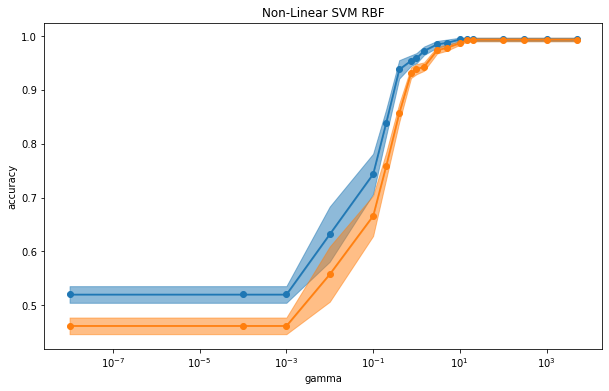

In [33]:
plt.figure(figsize=(10,6))
ax = plt.gca()
svm.create_errorband_axes(ax=ax)
ax.set_xscale('log')
ax.set_xlabel(svm.setting)
ax.set_ylabel('accuracy')
plt.title('Non-Linear SVM RBF')
plt.show()

In [34]:
svm.get_toppredictors()

,score
sitting_hours,0.709748
alcohol_freq,0.650756
age,0.598824
Acc_trauma,0.575126
season,0.564874
childish_disease,0.547227
smoking,0.546723
high_fevers,0.541681
surgical_int,0.505714


Sitting_hours is the top predictor followed by alcohol_freq while lowest predictor is surgical int.

In [35]:
svm.get_metric()['report']

,precision,recall,f1-score,support
0,1.0,1.0,1.0,15.0
1,1.0,1.0,1.0,28.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,43.0
weighted avg,1.0,1.0,1.0,43.0


The model has high precision, recall, and f1 score as well.

#### Exploring Top Predictors

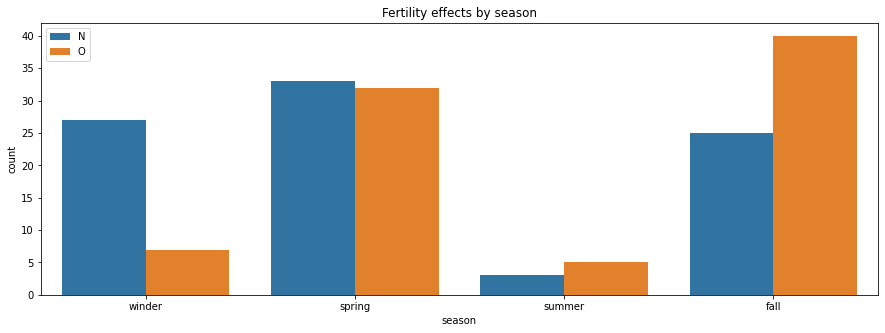

In [36]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=features.season, hue=target)
ax.set_xticklabels(['winder', 'spring', 'summer', 'fall'])
ax.set_title('Fertility effects by season')
plt.legend(['N', 'O'])
plt.show()

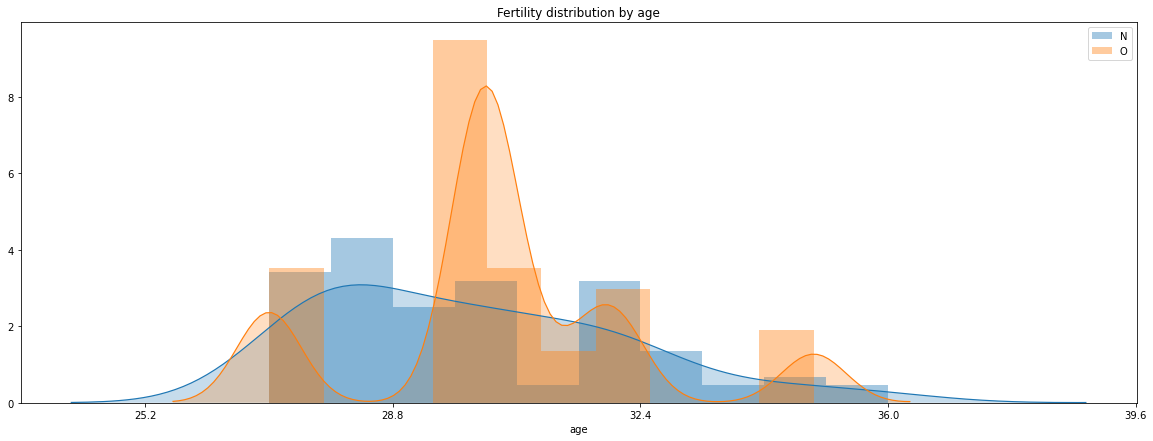

In [38]:
plt.figure(figsize=(20, 7))
ax = plt.gca()
sns.distplot(df_oversampled.age.loc[df.target == 'N'], bins=10, label='N',
             kde_kws={'lw': 1.2, 'shade': True}, ax=ax)
sns.distplot(df_oversampled.age.loc[df.target == 'O'], bins=10, label='O',
             kde_kws={'lw': 1.2, 'shade': True}, ax=ax)
xlabels = [f'{(x * 18 + 18):.1f}' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
plt.title('Fertility distribution by age')
plt.legend()
plt.show()

From the distribution plot above, we can observe that male in their late 20s and early 30s suffers from low fertility.
Note that age calculation was done by **actual age = age * baseline(18) + baseline(18)**.

# Results and Discussion

Upon exploring other models, we have observed that using Non-Linear SVM RBF yields the best result with an accuracy of 0.99 beating the KNN Classifier's 0.88 accuracy. Unlike KNN Classifier's top predictor which is age, Non-Linear SVM's top predictor is the number of hours sitting per day. Another benefit of using Non-Linear SVM RBF is training time, KNN takes a longer time train compared to using Non-Linear SVM which is 100 times faster. 

We have also observed the following differences in feature importance between KNN and Non-Linear SVM RBF:

| Rank |Previous KNN Results| Linear SVM RBF with Oversampling 
| :---: | :---: | :---: |
|1| Smoking | Number of Hours of Sitting | 
|2| Childish Disease | Alcohol Consumption | 
|3| High Fevers | Age |
|4| Surgical Intervention | Accidental Trauma |


#### Recommendations

1. Increase the sample size of the dataset to better increase the accuracy, and to better optimize the performance of the model when it comes to predicting data outside the ones worked on here. 

2. It may be better to get the patient id of each participant, and his previous records on the current features so we can better pinpoint what may have caused their fertility alteration through time. 

### Justification of the effects of each feature from previous study

1. **Number of hours sitting.** Increased number of hours sitting have a higher risk of Oligospermia which is a male fertility issue characterized by a low sperm production. This is correlated to the increased temperature of the scrotum when sitting on extended period of hours. [consumer.healthday.com](https://consumer.healthday.com/encyclopedia/fertility-19/infertility-news-412/lifestyle-and-fertility-643329.html)

2. **Alcohol consumption.** Temporary decreases in sperm counts and testosterone levels have been correlated to increased alcohol consumption. The good news is that the effects are reversible once alcohol consumption stops. [healthline.com](https://www.healthline.com/health/does-alcohol-kill-sperm-2#effect-on-male-fertility)

3. **Age.** While it is known that male can still bear children even at an older age, a greater age reduces the overall chances of pregnancy due to sperm quality decreases. [betterhealth.gov](https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/age-and-fertility#:~:text=Male%20fertility%20generally%20starts%20to,of%20miscarriage%20and%20fetal%20death.)

4. **Accidental Trauma.** Serious accidents and traumas (but non testicular trauma are used in the dataset) also have less sensitivity to male infertility. There are also no insightful papers that can confirm trauma as contributory to sperm production and should be further researched.

5. **Surgical intervention.** Surgical interventions on the reproductive parts have also shown to have high sensitivity on the sample dataset. However, there have been no definitive studies that might correlate surgeries with male infertility. This might necessitate to have further researches.

6. **High fevers.** It is shown that the testicles is held further away from the body to regulate its temperature. However, in times when the testicles cannot maintain this ideal temperature (during high fevers), sperm production can stop or be hindered for a short time. [txfertility.com](https://txfertility.com/the-sperm-cycle-i-got-a-fever-and-the-only-prescription-is/)

7. **Smoking.** Several studies have linked tobacco to be correlated with decreased sperm concentration, decreased motility, fewer normally shaped sperm, and increased sperm DNA damage. This is reflected on the model wherein the infertility is sensitive to smoking features of the dataset. [verywellfamily.com](https://www.verywellfamily.com/male-fertility-and-smoking-1960256)

8. **Childish Disease.** Some childish diseases (such as mumps, chicken pox) can cause orchitis later in adulthood that are known to impair the sperm production in the testis. [healthline.com](https://www.healthline.com/health/orchitis)

9. **Season/ time of year.** It was found that men with normal sperm production had the better sperm (in terms of swimming speed and quality) in the winter compared to other seasons of the year. [reuters.com](https://www.reuters.com/article/us-sperm/even-for-sperm-there-is-a-season-idUSBRE9290IW20130310#:~:text=(Reuters)%20%2D%20Autumn%20is%20the,in%20winter%20and%20early%20spring.)


---

Reference:
1. Fertility Dataset; UCI Machine Learning Repository; https://archive.ics.uci.edu/ml/datasets/Fertility
2. "Semen Parameters can be Predicted from Environmental Factors and Lifestyle using Aritificial Intelligence Methods" by: Jose L. Girela1, David Gil2, Magnus Johnsson, María José Gomez-Torres, and Joaquín De Juan